# Convolutional Neural Network with TensorFlow

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib
from matplotlib import pyplot as plt
from keras.utils import np_utils

In [28]:
labels = pd.read_csv('labels.csv')
# Using directory 
display(labels)
y = labels.CDR
y=(y*2).astype(int)

,Unnamed: 0,Filename,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Slice
0,0,OAS1_0001_MR1_55.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,55
1,1,OAS1_0001_MR1_120.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,120
2,2,OAS1_0001_MR1_180.png,OAS1_0001_MR1,F,R,74,2,3.0,29,0.0,1344,0.743,1.306,NaN,180
3,3,OAS1_0002_MR1_55.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,55
4,4,OAS1_0002_MR1_120.png,OAS1_0002_MR1,F,R,55,4,1.0,29,0.0,1147,0.810,1.531,NaN,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,604,OAS1_0449_MR1_120.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,120
605,605,OAS1_0449_MR1_180.png,OAS1_0449_MR1,F,R,71,3,4.0,29,0.0,1264,0.818,1.388,NaN,180
606,606,OAS1_0456_MR1_55.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,55
607,607,OAS1_0456_MR1_120.png,OAS1_0456_MR1,M,R,61,5,2.0,30,0.0,1637,0.780,1.072,NaN,120


In [29]:
data = np.zeros([609, 30976])

for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_name),axis=2).reshape(-1)
# Now we can use the file name to read the data

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(data, y, test_size=0.2, random_state=0)
print(y_train.shape, y_valid.shape)

print(data.shape)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(487,) (122,)
(609, 30976)
(487, 30976) (487,)
(122, 30976) (122,)


0.7598039507865906

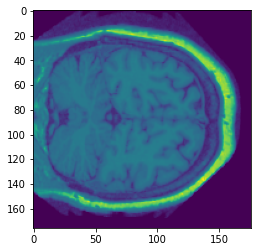

In [30]:
plt.imshow(X_train[1].reshape(176,176))
max(X_train[1]) 



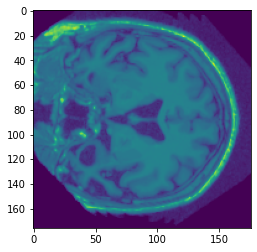

In [31]:
plt.imshow(X_valid[1].reshape(176,176))



In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout



In [33]:
X_train = X_train.reshape(-1, 176, 176, 1)
X_valid = X_valid.reshape(-1, 176, 176, 1)

In [36]:
from tensorflow.keras.layers import Flatten, MaxPooling2D, Conv2D
model = Sequential()
model.add(Conv2D(32, (10,10), padding = 'valid', input_shape=(176,176,1), activation = 'relu'))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(32, (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D((3,3)))
model.add(Conv2D(32, (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D((3,3)))
model.add(Flatten())
model.add(Dense(176))
model.add(Dense(10))
model.add(Dense(units=1, activation='relu'))
model.add(Dropout(.5))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 167, 167, 32)      3232      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 55, 55, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 53, 53, 32)        9248      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 17, 17, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 15, 15, 32)        9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 5, 5, 32)        

In [37]:
epochs = 5

history = model.fit(X_train, 
                    y_train, 
                    epochs=epochs, 
                    batch_size=32,
                    verbose=1,
                    validation_data=(X_valid, y_valid))

Epoch 1/5
16/16 [==============================] - 7s 394ms/step - loss: nan - accuracy: 0.5791 - val_loss: nan - val_accuracy: 0.5410
Epoch 2/5
16/16 [==============================] - 6s 387ms/step - loss: nan - accuracy: 0.5791 - val_loss: nan - val_accuracy: 0.5410
Epoch 3/5
16/16 [==============================] - 6s 407ms/step - loss: nan - accuracy: 0.5791 - val_loss: nan - val_accuracy: 0.5410
Epoch 4/5
16/16 [==============================] - 6s 397ms/step - loss: nan - accuracy: 0.5791 - val_loss: nan - val_accuracy: 0.5410
Epoch 5/5
16/16 [==============================] - 6s 383ms/step - loss: nan - accuracy: 0.5791 - val_loss: nan - val_accuracy: 0.5410
